In [1]:
!pip install kaggle


import os
def get_size(path = os.getcwd()):
    print("Calculating Size: ",path)
    total_size = 0
    #if path is directory--
    if os.path.isdir(path):
      print("Path type : Directory/Folder")
      for dirpath, dirnames, filenames in os.walk(path):
          for f in filenames:
              fp = os.path.join(dirpath, f)
              # skip if it is symbolic link
              if not os.path.islink(fp):
                  total_size += os.path.getsize(fp)
    #if path is a file---
    elif os.path.isfile(path):
      print("Path type : File")
      total_size=os.path.getsize(path)
    else:
      print("Path Type : Special File (Socket, FIFO, Device File)" )
      total_size=0
    bytesize=total_size
    print(bytesize, 'bytes')
    print(bytesize/(1024), 'kilobytes')
    print(bytesize/(1024*1024), 'megabytes')
    print(bytesize/(1024*1024*1024), 'gegabytes')
    return total_size


x=get_size("/content/examples")



import os
os.makedirs("/content/.kaggle/")

import json
token = {"username":"farhanhaikhan","key":"f2c0df223af325f0d811a0f18b0c02ca"}
with open('/content/.kaggle/kaggle.json', 'a+') as file:
    json.dump(token, file)

import shutil
os.makedirs("/.kaggle/")
src="/content/.kaggle/kaggle.json"
des="/.kaggle/kaggle.json"
shutil.copy(src,des)


os.makedirs("/root/.kaggle/")
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content

#https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463

"""
!kaggle competitions download -c digit-recognizer

!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
"""
!kaggle datasets download -d kmader/parkinsons-drawings
"""
!unzip -q covid19-radiography-database.zip -d /content/dataset



src="/content/Dataset.zip"
des="/content/DATA/"
get_ipython().system('unzip -q {} -d {}'.format(src,des))
"""

Calculating Size:  /content/examples
Path Type : Special File (Socket, FIFO, Device File)
0 bytes
0.0 kilobytes
0.0 megabytes
0.0 gegabytes
- path is now set to: /content
 75% 31.0M/41.4M [00:00<00:00, 60.9MB/s]
100% 41.4M/41.4M [00:00<00:00, 76.6MB/s]


'\n!unzip -q covid19-radiography-database.zip -d /content/dataset\n\n\n\nsrc="/content/Dataset.zip"\ndes="/content/DATA/"\nget_ipython().system(\'unzip -q {} -d {}\'.format(src,des))\n'

In [2]:
src="/content/datasets/kmader/parkinsons-drawings/parkinsons-drawings.zip"
des="/content/DATA/"
get_ipython().system('unzip -q {} -d {}'.format(src,des))

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [51]:
from sklearn.preprocessing import StandardScaler
def ScaleData(data):
  scaler = StandardScaler()
  # transform data
  scaled = scaler.fit_transform(data)
  return scaled

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
plt.style.use('dark_background')
import cv2
# SIZE=256
SIZE= 128
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def dispimgs(path,disp=0):
    # reading png image file
    im = plt.imread(path)
    if im.shape[-1]==4:
        im = rgba2rgb(im)
    im = cv2.resize(im,(SIZE,SIZE))
    im = rgb2gray(im)
    # show image
    if disp==1:
        plt.imshow(im,cmap='gray')
    return im

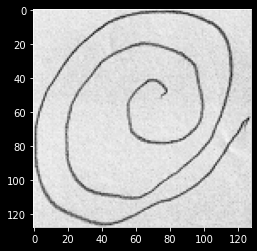

In [5]:
p5 = '//content/DATA/drawings/spiral/testing/parkinson/V11PE03.png'
dispimgs(p5,disp = 1);

In [6]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result
RES='/content/DATA/drawings'
png_file=find('*.png', RES)
# print(png_file)

In [7]:
imgs_list = []
# req_size = (256, 256)
req_size =(SIZE,SIZE)
for file in png_file:
        a = dispimgs(file)
        if not a.shape==req_size:
            print(False)
        # print(a.shape)
        imgs_list.append(a)

In [8]:
"""
healthy = 0
parkinson = 1
"""
CLASS_MAPS = {"healthy" : 0, "parkinson" : 1}
def load_data(datapath):
    # array
    datafiles=os.listdir(datapath)
    # res = np.zeros((len(datafiles),SIZE,SIZE,3))
    res = np.zeros((len(datafiles),SIZE,SIZE))
    for i,filename in enumerate(datafiles):
        filepath = os.path.join(datapath,filename)
        res[i] = dispimgs(filepath)
    return res

def load_data_list(datapath):
    datafiles=os.listdir(datapath)
    res = [0]*len(datafiles)
    for i,filename in enumerate(datafiles):
        filepath = os.path.join(datapath,filename)
        res[i] = dispimgs(filepath)
    return res

def load_parkinson(MainPath , subtype="training"):
    Xs = []
    ys = []
    for each_class in CLASS_MAPS.keys():
        ImgPath = os.path.join(MainPath, subtype,each_class)
        LoadedData = load_data_list(ImgPath)
        Xs = Xs + LoadedData
        Class_Vals = [CLASS_MAPS[each_class]]*len(LoadedData)
        ys = ys + Class_Vals
    return Xs,ys
        
# spiral
# X_train,X_test,y_test,y_train = 
# ../input/parkinsons-drawings/spiral/training/healthy/V01HE02.png

X_train_spi, y_train_spi =  load_parkinson(MainPath="/content/DATA/drawings/spiral/" , subtype="training")
X_test_spi , y_test_spi =  load_parkinson(MainPath="/content/DATA/drawings/spiral/" , subtype="testing")


# wave
X_train_wav , y_train_wav = load_parkinson(MainPath="/content/DATA/drawings/wave/" , subtype="training")
X_test_wav , y_test_wav  = load_parkinson(MainPath="/content/DATA/drawings/wave/" , subtype="testing")


In [9]:
X_train = np.array(X_train_spi).reshape(len(X_train_spi),-1)
X_train.shape

(72, 16384)

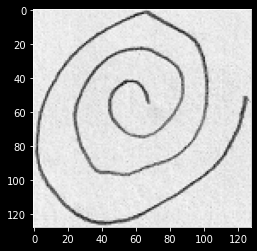

In [10]:
plt.imshow(X_train_spi[0],cmap='gray');

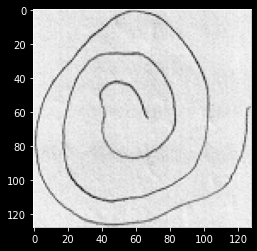

In [11]:
plt.imshow(imgs_list[5],cmap='gray');

In [56]:
from copy import deepcopy
X_train = deepcopy(np.array(X_train_spi))

X_train = X_train.reshape(-1,X_train.shape[-1]*X_train.shape[-2])
X_train = ScaleData(X_train)
print(X_train.shape)

X_test = deepcopy(np.array(X_test_spi))

X_test = X_test.reshape(-1,X_test.shape[-1]*X_test.shape[-2])
X_test = ScaleData(X_test)
print(X_test.shape)

(72, 16384)
(30, 16384)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

for i in range(1,20):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train_spi)    
  predictions = model.predict(X_test)
  accuracy = metrics.accuracy_score(predictions,y_test_spi)  
  print(i,"Accuracy : %s" % "{0:.3%}".format(accuracy))

1 Accuracy : 73.333%
2 Accuracy : 60.000%
3 Accuracy : 70.000%
4 Accuracy : 60.000%
5 Accuracy : 63.333%
6 Accuracy : 50.000%
7 Accuracy : 60.000%
8 Accuracy : 63.333%
9 Accuracy : 56.667%
10 Accuracy : 76.667%
11 Accuracy : 73.333%
12 Accuracy : 76.667%
13 Accuracy : 66.667%
14 Accuracy : 66.667%
15 Accuracy : 66.667%
16 Accuracy : 73.333%
17 Accuracy : 70.000%
18 Accuracy : 73.333%
19 Accuracy : 73.333%


In [65]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train_spi)    
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test_spi)  
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 76.667%


In [66]:
# /content/DATA/spiral/testing/parkinson/V01PE01.png
import sklearn
sklearn.__version__

'0.22.2.post1'

In [67]:
import pickle

kNNModelPath = "kNNModel.p"
pickle.dump( model, open( kNNModelPath , "wb" ) )
model = pickle.load( open( kNNModelPath , "rb" ) )

In [68]:
imgPath = "/content/DATA/spiral/testing/parkinson/V01PE01.png"
img = dispimgs(imgPath)

In [69]:
img.shape

(128, 128)

In [72]:
imgres = ScaleData(img.reshape(1,-1))
imgres.shape

(1, 16384)

In [73]:
pred = model.predict(imgres)
CLASS_LABELS = {0 : "healthy", 1: "parkinson"}
print(CLASS_LABELS[pred[0]])

parkinson


In [ ]:
CLASS_LABELS = {0 : "healthy", 1: "parkinson"}
def RunParkinsonInferences(imgPath):
  img = dispimgs(imgPath)
  imgres = ScaleData(img.reshape(1,-1))
  pred = model.predict(imgres)
  return CLASS_LABELS[pred[0]]

RunParkinsonInferences("/content/DATA/spiral/testing/parkinson/V01PE01.png")

In [1]:
CLASS_LABELS = {0 : "healthy", 1: "parkinson"}

from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn import metrics

def ScaleData(data):
  scaler = StandardScaler()
  # transform data
  scaled = scaler.fit_transform(data)
  return scaled

SIZE= 128
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def dispimgs(path,disp=0):
    # reading png image file
    im = plt.imread(path)
    if im.shape[-1]==4:
        im = rgba2rgb(im)
    im = cv2.resize(im,(SIZE,SIZE))
    im = rgb2gray(im)
    return im

def RunParkinsonInferences(imgPath):
  img = dispimgs(imgPath)
  imgres = ScaleData(img.reshape(1,-1))
  pred = model.predict(imgres)
  return CLASS_LABELS[pred[0]]

kNNModelPath = "kNNModel.p"
model = pickle.load( open( kNNModelPath , "rb" ) )
RunParkinsonInferences("/content/DATA/spiral/testing/parkinson/V01PE01.png")

'parkinson'

In [84]:
from sklearn.manifold import TSNE # import TSNE functionality from the Scikit-Learn Library
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 42)
# Instantiate the TSNE Object with Hyperparameters
tsne_results_2D = tsne.fit_transform(X_train) # Fit the dataset to the TSNE object
reduced_df=pd.DataFrame(np.c_[y_train_spi ,tsne_results_2D[:,0],tsne_results_2D[:,1]], columns=['y','tsne-2d-one','tsne-2d-two' ])

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.001s...
[t-SNE] Computed neighbors for 72 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 0.088463
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.863144
[t-SNE] KL divergence after 300 iterations: 0.867588


In [85]:
# store the TSNE results in a dataframe
reduced_df.head(4) #display the first 4 rows in the saved dataframe

,y,tsne-2d-one,tsne-2d-two
0,0.0,-3.781056,16.922211
1,0.0,41.071484,23.414864
2,0.0,-6.844581,-27.265194
3,0.0,6.058204,-22.669001


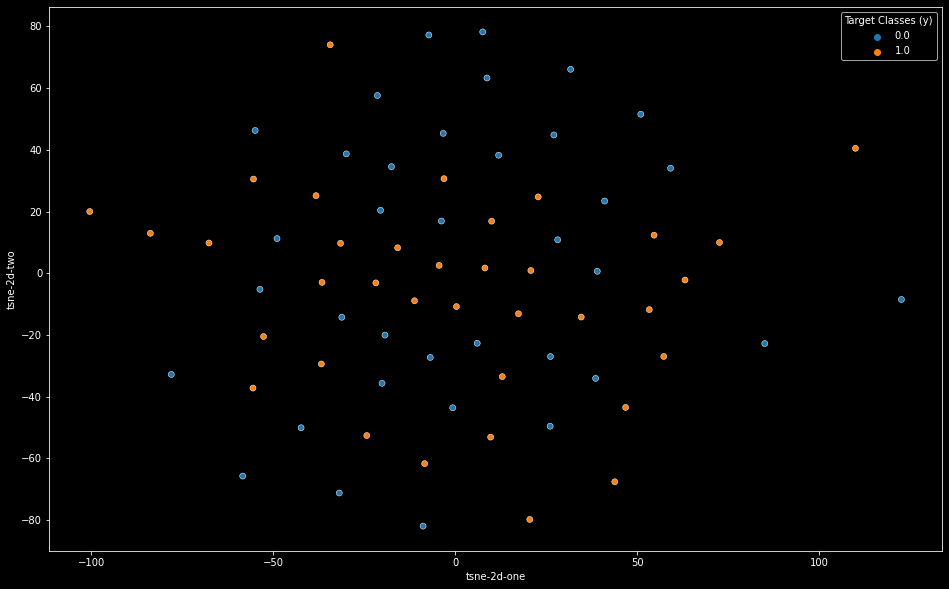

In [88]:
fig=plt.figure(figsize=(16,10)) # initialize the figure and set the figure size

reduced_df_sorted=reduced_df.sort_values(by='y', ascending=True)
# sort the dataframe by labels for better visualization results
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="y",
                # provide the x & y dataframe columns
                # provide a hue column from the target variable
                palette=sns.color_palette("tab10", 2), # Color Palette for Seaborn ( Other Sets - hls, rocket, icefire , Spectral )
                data=reduced_df_sorted, # provide the dataframe
                legend="full", # display the full legend
                alpha=1) # set the transparency of points to 0% (opaques points)
# plot the scatter plot using Seaborn with parameters
# set the plot metadata such as legend title and plot title
plt.legend(title="Target Classes (y)");

In [89]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, random_state = 42)
# Instantiate the TSNE Object with Hyperparameters for 3D visualization
tsne_results_3D = tsne.fit_transform(X_train) # Fit the dataset to the 3D TSNE object

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.003s...
[t-SNE] Computed neighbors for 72 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 0.088463
[t-SNE] KL divergence after 250 iterations with early exaggeration: 153.342377
[t-SNE] KL divergence after 300 iterations: 3.074218


In [90]:
reduced_df['tsne-3d-one']=tsne_results_3D[:,0] # add TSNE 3D results to the dataframe
reduced_df['tsne-3d-two']=tsne_results_3D[:,1]
reduced_df['tsne-3d-three']=tsne_results_3D[:,2]
reduced_df.tail(4) 

,y,tsne-2d-one,tsne-2d-two,tsne-3d-one,tsne-3d-two,tsne-3d-three
68,1.0,20.509983,-79.748245,30.476688,16.136450,-19.884310
69,1.0,12.943319,-33.476551,-46.624084,-3.836887,30.926352
70,1.0,54.653934,12.349419,35.245720,6.311676,43.844608
71,1.0,-31.491322,9.711879,-24.253649,-39.247536,-5.964020


In [94]:
import plotly.express as px # import express plotly for interactive visualizations
univ_seed = 42
df_sampled_sorted=reduced_df.sort_values(by='y', ascending=True)
# sort the dataframe for better viz w.r.t. target variable
fig = px.scatter_3d(df_sampled_sorted, x='tsne-3d-one', y='tsne-3d-two', z='tsne-3d-three',
color='y', template="plotly_dark") # make a 3D scatterplot using plotly express
df = pd.DataFrame({ "0":[0],"1":[0],"2":[0]})
fig.add_trace(
    px.scatter_3d(df, x="0", y='1', z='2',
color='0', template="plotly_dark")
)
fig.show()

fig.write_html("Parkinsons_Dataset_tSNE_3D_Viz.html") # save the plot to interactive html
fig.show()
# TSNE Fails

ValueError: ignored